In [17]:
import pandas as pd
import numpy as np
import numpy.matlib
import scipy
import math
from matplotlib import pyplot as plt

N = 43886
kiber = pd.read_csv('Kibergrad.csv')

# točki a in b
vzorec = pd.DataFrame(kiber.sample(n = 200))

p_bar = len(vzorec[vzorec.IZOBRAZBA <= 38]) / 200
print('Ocena za delež družin, v katerih vodja gospodinjstva nima srednješolske izobrazbe je ' + str(p_bar))

print('Ocenimo še standardno napako:')
se_bar = ((p_bar * (1 - p_bar) / 199) * (N - 200) / N) ** 0.5
print('Nepristranska točkovna ocena za standardno napako stopnje izobrazbe je ' + str(se_bar))
c = se_bar * 1.98 # vzel kvantil pri 120 prostostnih stopnjah kot dober približek za 199 prostostnih stopenj
print('S pomočjo te ocene nato dobimo še 95 odstoten interval zaupanja [' + str(p_bar - c) + ', ' + str(p_bar + c) + '].')

Ocena za delež družin, v katerih vodja gospodinjstva nima srednješolske izobrazbe je 0.205
Ocenimo še standardno napako:
Nepristranska točkovna ocena za standardno napako stopnje izobrazbe je 0.028552365735181714
S pomočjo te ocene nato dobimo še 95 odstoten interval zaupanja [0.1484663158443402, 0.2615336841556598].


In [18]:
# točka c
p = len(kiber[kiber.IZOBRAZBA <= 38]) / N
print('Populacijski delež gospodinjstev, v katerih vodja gospodinjstva nima srednješolske izobrazbe je: ' + str(p))
if p >= p_bar - c and p <= p_bar + c: # priprava na točko d
    stevec = 1
else:
    stevec = 0
se = (((p * (1 - p)) / 200) * (N - 200) / (N-1)) ** 0.5
print('Prava standardna napaka je: ' + str(se))

Populacijski delež gospodinjstev, v katerih vodja gospodinjstva nima srednješolske izobrazbe je: 0.21150252928040833
Prava standardna napaka je: 0.028810847022556974


Povprečna dolžina intervalov je 0.11370538335719488
Število intervalov, ki pokrije populacijski delež je 554


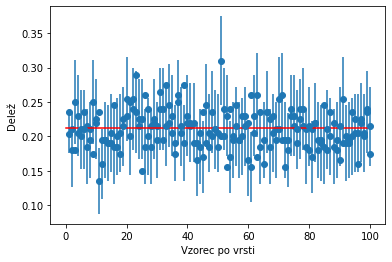

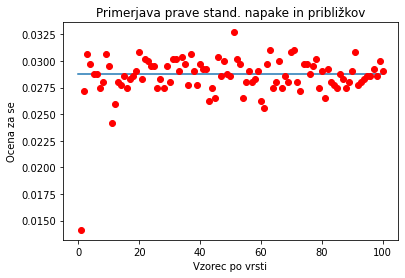

In [39]:
# točki d in e za vzorce velikosti 200
a = [1]
b1 = [p_bar] # za intervale
b2 = [se_bar] # za ocene SE
er = [c]

dolzina_int = 0
for x in range(99):
    vzorec = pd.DataFrame(kiber.sample(n = 200))
    p_bar = len(vzorec[vzorec.IZOBRAZBA <= 38]) / 200
    se_bar = ((p_bar * (1 - p_bar) / 199) * (N - 200) / N) ** 0.5
    c = se_bar * 1.98
    if p >= p_bar - c and p <= p_bar + c:
        stevec = stevec + 1

    dolzina_int = dolzina_int + 2*c
    a.append(x + 2)
    b1.append(p_bar)
    er.append(c)
    b2.append(se_bar) # standardni odklon vzorčnega deleža je točno standardna napaka, ki pa jo na podlagi vzorca ocenimo ni dodamo v seznam.

dolzina_int = dolzina_int / 99
print('Povprečna dolžina intervalov je ' + str(dolzina_int))
print('Število intervalov, ki pokrije populacijski delež je '+ str(stevec))
plt.scatter(a,b)

t = np.linspace(0,100,1000)
P1 = []
P2 = []
for x in range(len(t)):
    P1.append(p)
    P2.append(se)

plt.xlabel('Vzorec po vrsti')
plt.ylabel('Delež')
plt.errorbar(a, b1, yerr=er, fmt="o")
plt.plot(t, P1, 'r')
plt.show()

plt.title('Primerjava prave stand. napake in približkov')
plt.xlabel('Vzorec po vrsti')
plt.ylabel('Ocena za se')
plt.plot(t, P2)
plt.plot(a, b2, 'ro')
plt.show()

Povprečna dolžina intervalov je 0.0563255260243455
Število intervalov, ki pokrije populacijski delež je 95
Standardna napaka je v tem primeru enaka 0.014306156731284972.


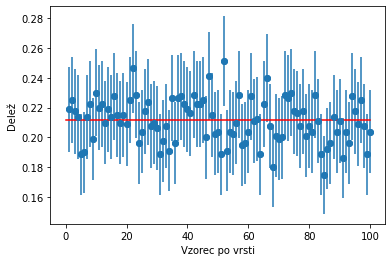

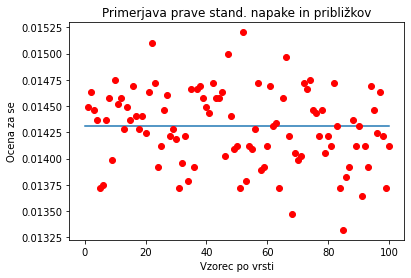

In [38]:
# točki e in d še za 100 vzorcev velikosti 800
stevec2 = 0
a2 = [] # x os
b1_2 = [] # ocene za delež
er2 = [] # polovica širine intervala zaupanja
b2_2 = [] # ocene za stand. napako


dolzina_int = 0
se2 = (((p * (1 - p)) / 800) * (N - 800) / (N-1)) ** 0.5
for x in range(100):
    vzorec = pd.DataFrame(kiber.sample(n = 800))
    p_bar = len(vzorec[vzorec.IZOBRAZBA <= 38]) / 800
    se_bar = ((p_bar * (1 - p_bar) / 799) * (N - 800) / N) ** 0.5
    c = se_bar * 1.97 # verjetno lahko vzamemo 1.97 ali 1.98 (zanemarljiva razlika)
    if p >= p_bar - c and p <= p_bar + c:
        stevec2 = stevec2 + 1

    dolzina_int = dolzina_int + 2*c
    a2.append(x + 1)
    b1_2.append(p_bar)
    er2.append(c)
    b2_2.append(se_bar)

dolzina_int = dolzina_int / 100
print('Povprečna dolžina intervalov je ' + str(dolzina_int))
print('Število intervalov, ki pokrije populacijski delež je '+ str(stevec2))
print('Standardna napaka je v tem primeru enaka ' + str(se2) + '.')
plt.scatter(a2,b1_2)

t = np.linspace(0,100,1000)
P1 = []
P2 = []
for x in range(len(t)):
    P1.append(p)
    P2.append(se2)

plt.xlabel('Vzorec po vrsti')
plt.ylabel('Delež')
plt.errorbar(a2, b1_2, yerr=er2, fmt="o")
plt.plot(t, P1, 'r')
plt.show()

plt.title('Primerjava prave stand. napake in približkov')
plt.xlabel('Vzorec po vrsti')
plt.ylabel('Ocena za se')
plt.plot(t, P2)
plt.plot(a2, b2_2, 'ro')
plt.show()

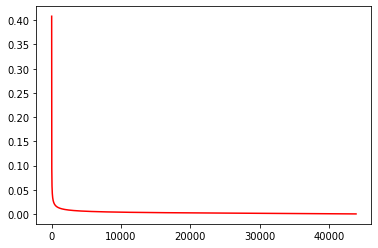

In [45]:
# standardna napaka v odvisnosti od velikosti vzorca za dani N
x = np.linspace(1,N,N)
y = (((p * (1 - p)) / x) * (N - x) / (N-1)) ** 0.5

plt.title('Standardna napaka pri N=43886')
plt.xlabel('Velikost vzorca')
plt.ylabel('Standardna napaka')
plt.plot(x,y,'r')

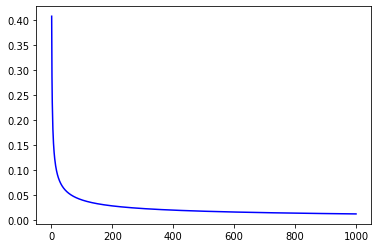

In [47]:
x2 = np.linspace(1,1000, 1000)
y2 = (((p * (1 - p)) / x2) * (N - x2) / (N-1)) ** 0.5

plt.title('Standardna napaka pri N=43886')
plt.xlabel('Velikost vzorca')
plt.ylabel('Standardna napaka')
plt.plot(x2,y2,'b')